# Feature set 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


#### Extracting data from csv files into numpy arrays

In [2]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
files_data=np.array(['fold_data_1.csv','fold_data_2.csv','fold_data_3.csv','fold_data_4.csv','fold_data_5.csv',
                'fold_data_6.csv','fold_data_7.csv','fold_data_8.csv','fold_data_9.csv','fold_data_10.csv'])
X_data_data= np.array([genfromtxt(file,delimiter=',') for file in files_data])

files_label=(['fold_labels_1.csv','fold_labels_2.csv','fold_labels_3.csv','fold_labels_4.csv','fold_labels_5.csv',
                'fold_labels_6.csv','fold_labels_7.csv','fold_labels_8.csv','fold_labels_9.csv','fold_labels_10.csv'])
Y_data_labels= np.array([genfromtxt(file,delimiter=',') for file in files_label])


In [3]:
print(np.shape(X_data_data[0]))

(873, 240)


#### Converting to Hot Encoder

In [4]:
Y_data=([to_categorical(Y_data_labels, num_classes=10) for Y_data_labels in Y_data_labels])
#print(Y_data)

#### Reshaping to 1D

In [5]:
X_data_1D=([np.reshape(X_data_data,(X_data_data.shape[0], 240, 1)) for X_data_data in X_data_data])

#### Reshaping to 2D

In [6]:
X_data_2D=([np.reshape(X_data_1D,(X_data_1D.shape[0], 60, 4)) for X_data_1D in X_data_1D])
print(np.shape(X_data_2D[0]))

(873, 60, 4)


#### CNN formatting

In [7]:
X_data=([np.reshape(X_data_2D,(X_data_2D.shape[0],60,4,1)) for X_data_2D in X_data_2D])

#### Shapes of the data


In [8]:
for i in range((10)):
    print("X_data",i+1,"=",np.shape(X_data[i]))
    print("Y_data",i+1,"=",np.shape(Y_data[i]))

X_data 1 = (873, 60, 4, 1)
Y_data 1 = (873, 10)
X_data 2 = (888, 60, 4, 1)
Y_data 2 = (888, 10)
X_data 3 = (925, 60, 4, 1)
Y_data 3 = (925, 10)
X_data 4 = (990, 60, 4, 1)
Y_data 4 = (990, 10)
X_data 5 = (936, 60, 4, 1)
Y_data 5 = (936, 10)
X_data 6 = (823, 60, 4, 1)
Y_data 6 = (823, 10)
X_data 7 = (838, 60, 4, 1)
Y_data 7 = (838, 10)
X_data 8 = (806, 60, 4, 1)
Y_data 8 = (806, 10)
X_data 9 = (816, 60, 4, 1)
Y_data 9 = (816, 10)
X_data 10 = (837, 60, 4, 1)
Y_data 10 = (837, 10)


### Defining Epoch number and Batch size for the models

In [9]:
Batch_size=50
Epoch_number=30
epoch_array=np.linspace(1,Epoch_number,num=((Epoch_number)))
Fold_iteration=np.array([1,2,3,4,5,6,7,8,9,10])

#### Model

In [10]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,merge,Activation

In [11]:
# Model from GitHub

#adding layers and forming the model

#forming model
model=Sequential()

model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(60,4,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))
#compiling
Model_Git_hub=model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Selecting Test sets and combining them

In [12]:
Test1=([0,1,2,3,4,5,6,7,8,9])
Test2=([1,2,3,4,5,6,7,8,9,0])
Test=([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,0)])
Testing_set=[Test for Test in Test]
x_test=[np.vstack([X_data[Testing_set[0][0]],X_data[Testing_set[0][1]]]) for Testing_set[0] in Test]
y_test=[np.vstack([Y_data[Testing_set[0][0]],Y_data[Testing_set[0][1]]]) for Testing_set[0] in Test]

#### Choosing Batch size and number of Epochs

In [13]:
Accuracy_array=[]
accuracy_total=0
end_array=[]

Epoch_array_accuracy=[]
Loss_array=[]
Fold_accuracy=[]

Val_accuracy_array=[]
Val_Loss_array=[]

Avg_Accuracy=[]
Time=[]

#early_stopping_cb = EarlyStopping(patience=25, restore_best_weights=True)

In [14]:
def Model_run(model_history,model,Accuracy_array,accuracy_total,end_array,Epoch_array_accuracy,Loss_array,
             Fold_accuracy,Val_accuracy_array,Val_Loss_array):
   
    
    for i in range(10):
        start = time.time()
        Training_array=np.array([0,1,2,3,4,5,6,7,8,9])
        Training_array = Training_array[Training_array != Test1[i]]
        Training_array = Training_array[Training_array != Test2[i]]
    
        print("\nFOLD",i+1,"\n- - - - - - - - - - - - - - - - - - - - ")
    
        print("Testing on Folds:",Test[i])
    
        Training_set=[Training_array for Training_array in Training_array]
    
        print("Training off of Folds:",Training_set)
    
        X_train = np.vstack([X_data[Training_set[0]],X_data[Training_set[1]],X_data[Training_set[2]],X_data[Training_set[3]]
                        ,X_data[Training_set[4]],X_data[Training_set[5]],X_data[Training_set[6]],X_data[Training_set[7]]])
    
        Y_train = np.vstack([Y_data[Training_set[0]],Y_data[Training_set[1]],Y_data[Training_set[2]],Y_data[Training_set[3]]
                        ,Y_data[Training_set[4]],Y_data[Training_set[5]],Y_data[Training_set[6]],Y_data[Training_set[7]]])                   
   
        #model_history = model.fit(X_train,Y_train,batch_size=Batch_size,epochs=Epoch_number,validation_data=(x_test[i],y_test[i])
        #                          ,verbose=0,callbacks=[early_stopping_cb])
        model_history = model.fit(X_train,Y_train,batch_size=Batch_size,epochs=Epoch_number,validation_data=(x_test[i],y_test[i])
                                  ,verbose=0)
        accuracy=model_history.history['accuracy']
        accuracy_avg=sum(accuracy)/Epoch_number
        Fold_accuracy.append(accuracy_avg)
        print("Accuracy of Fold",i+1,"is",round((Fold_accuracy[i]),3))
        end = time.time()
        print("Time to train Fold",i+1,":",round(((end)- (start)),4),"seconds.")
        end_array.append(round(((end)- (start)),4))
    
        Epoch_array=model_history.history['accuracy']
        Epoch_array_accuracy.append(Epoch_array)
        loss=model_history.history['loss']
        Loss_array.append(loss)
    
    
        Epoch_val_array=model_history.history['val_accuracy']
        Val_accuracy_array.append(Epoch_val_array)
    
        loss_val=model_history.history['val_loss']
        Val_Loss_array.append(loss_val)
    
    Avg_Accuracy=np.mean(Fold_accuracy)       
    Time=sum(end_array)
    print("\n - - - - - - - - - - - - - - -\nThe average accuracy of the model:",(Avg_Accuracy))
    print("The time taken to run model:",Time)
    return Avg_Accuracy,Time

In [15]:
Model=Model_run(Model_Git_hub,model,Accuracy_array,accuracy_total,end_array,Epoch_array_accuracy,Loss_array,
             Fold_accuracy,Val_accuracy_array,Val_Loss_array)
Avg_Accuracy=Model[0]
Time=Model[1]


FOLD 1 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (0, 1)
Training off of Folds: [2, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 1 is 0.489
Time to train Fold 1 : 141.0311 seconds.

FOLD 2 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (1, 2)
Training off of Folds: [0, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 2 is 0.741
Time to train Fold 2 : 154.5898 seconds.

FOLD 3 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (2, 3)
Training off of Folds: [0, 1, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 3 is 0.807
Time to train Fold 3 : 153.1795 seconds.

FOLD 4 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (3, 4)
Training off of Folds: [0, 1, 2, 5, 6, 7, 8, 9]
Accuracy of Fold 4 is 0.82
Time to train Fold 4 : 155.294 seconds.

FOLD 5 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (4, 5)
Training off of Folds: [0, 1, 2, 3, 6, 7, 8, 9]
Accuracy of Fold 5 is 0.859
Time to train Fold 5 : 159.0886 seconds.

FOLD 6 
- - - - - - - - - - - - - - - - -

In [16]:
def Graph_func(Epoch_number,Epoch_array_accuracy,Val_accuracy_array,Loss_array,Val_loss_array):
    %matplotlib inline
    
    fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig.suptitle(f"Accuracy of each Epoch for each Fold")
    ax1.set_xlabel("Epoch number")
    ax1.set_ylabel("Accuracy")
    ax1.grid()
    for i in range(10):
        ax1.plot(epoch_array,Epoch_array_accuracy[i],label=('Fold',i+1))
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
    fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig.suptitle(f"Accuracy of each Epoch for each Fold")
    ax1.set_xlabel("Epoch number")
    ax1.set_ylabel("Val Accuracy")
    ax1.grid()
    for i in range(10):
        ax1.plot(epoch_array,Val_accuracy_array[i],label=('Fold',i+1))
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig1.suptitle(f"Loss of each Epoch for each Fold")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.grid()
    for i in range(10):
        ax2.plot(epoch_array,Loss_array[i],label=('Fold',i+1))
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))    

    
    fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig1.suptitle(f"Val Loss of each Epoch for each Fold")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Val Loss")
    ax2.grid()
    for i in range(10):
        ax2.plot(epoch_array,Val_Loss_array[i],label=('Fold',i+1))
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))   

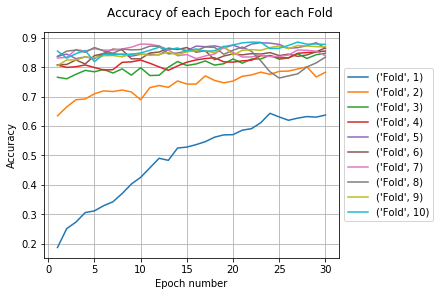

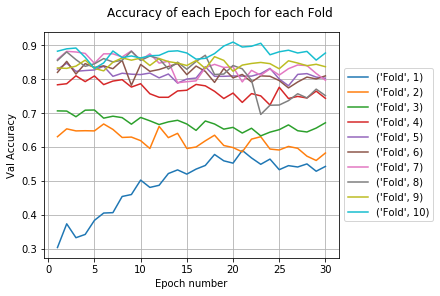

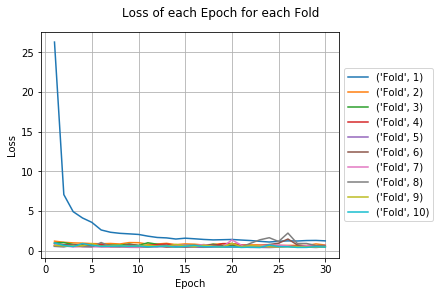

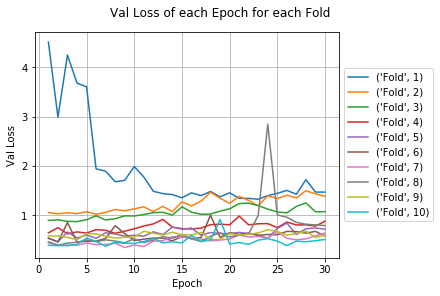

In [17]:
Graph_Epochs_model_Git_hub=Graph_func(Epoch_number,Epoch_array_accuracy,Val_accuracy_array,Loss_array,Val_Loss_array)

In [18]:
def table_maker(Fold_accuracy,end_array,Avg_Accuracy,Time):
    data= {'Fold': ['1','2','3','4','5','6','7','8','9','10'],
           'Accuracy': [Fold_accuracy[0],Fold_accuracy[1],Fold_accuracy[2],Fold_accuracy[3],Fold_accuracy[4],
                    Fold_accuracy[5],Fold_accuracy[6],Fold_accuracy[7],Fold_accuracy[8],Fold_accuracy[9]],
           'Time Taken' :[end_array[0],end_array[1],end_array[2],end_array[3],end_array[4],end_array[5],end_array[6],end_array[7],
                end_array[8],end_array[9]]}
    df = pd.DataFrame(data, columns = ['Fold', 'Accuracy','Time Taken'])
    data_avg={'Average Accuracy':[Avg_Accuracy],'Total Time':[Time]}
    df_avg=pd.DataFrame(data_avg,columns=['Average Accuracy','Total Time'])
    print (df)
    print ("\n",df_avg)

In [19]:
Table_model_Git_hub=table_maker(Fold_accuracy,end_array,Avg_Accuracy,Time)

  Fold  Accuracy  Time Taken
0    1  0.489385    141.0311
1    2  0.741417    154.5898
2    3  0.806748    153.1795
3    4  0.819943    155.2940
4    5  0.858516    159.0886
5    6  0.843058    162.0365
6    7  0.850950    154.8631
7    8  0.841022    162.9991
8    9  0.849847    175.3195
9   10  0.861151    164.2290

    Average Accuracy  Total Time
0          0.796204   1582.6302


In [20]:
def Graph_Avg_maker(Fold_iteration,Fold_accuracy,Avg_Accuracy):
    %matplotlib inline
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    ax1.plot(Fold_iteration,Fold_accuracy,"gx")
    ax1.axhline(y=Avg_Accuracy,label='Average Accuracy')
    fig.suptitle(f"Results for Batch size of {Batch_size}\n and Epoch number of {Epoch_number}\n for Feature set 1")
    ax1.set_xlabel("Fold iteration")
    ax1.set_ylabel("Accuracy")
    ax1.grid()
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

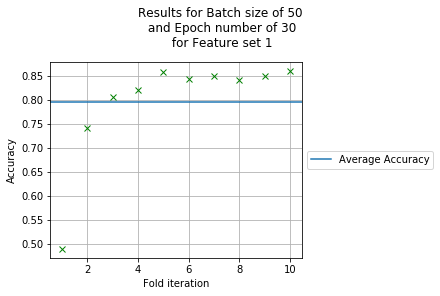

In [21]:
Graph_Avg_model_Git_hub=Graph_Avg_maker(Fold_iteration,Fold_accuracy,Avg_Accuracy)

# New Model 1

In [22]:
#adding layers and forming the model_1
#forming model_1
model_1=Sequential()

model_1.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(60,4,1)))
model_1.add(MaxPooling2D(padding="same"))

model_1.add(Flatten())

model_1.add(Dense(10,activation="softmax"))
#compiling
Model_1=model_1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
Accuracy_array_1=[]
accuracy_total_1=0
end_array_1=[]

Epoch_array_accuracy_1=[]
Loss_array_1=[]
Fold_accuracy_1=[]

Val_accuracy_array_1=[]
Val_Loss_array_1=[]

Avg_Accuracy_1=[]
Time_1=[]

In [24]:
Model_1=Model_run(Model_1,model_1,Accuracy_array_1,accuracy_total_1,end_array_1,Epoch_array_accuracy_1,Loss_array_1,
             Fold_accuracy_1,Val_accuracy_array_1,Val_Loss_array_1)
Avg_Accuracy_1=Model_1[0]
Time_1=Model_1[1]


FOLD 1 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (0, 1)
Training off of Folds: [2, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 1 is 0.715
Time to train Fold 1 : 31.1357 seconds.

FOLD 2 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (1, 2)
Training off of Folds: [0, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 2 is 0.846
Time to train Fold 2 : 31.1581 seconds.

FOLD 3 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (2, 3)
Training off of Folds: [0, 1, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 3 is 0.879
Time to train Fold 3 : 31.1261 seconds.

FOLD 4 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (3, 4)
Training off of Folds: [0, 1, 2, 5, 6, 7, 8, 9]
Accuracy of Fold 4 is 0.891
Time to train Fold 4 : 30.8901 seconds.

FOLD 5 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (4, 5)
Training off of Folds: [0, 1, 2, 3, 6, 7, 8, 9]
Accuracy of Fold 5 is 0.909
Time to train Fold 5 : 31.5637 seconds.

FOLD 6 
- - - - - - - - - - - - - - - - - - 

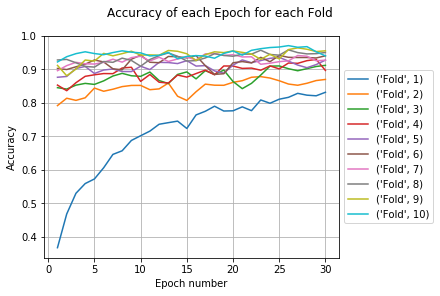

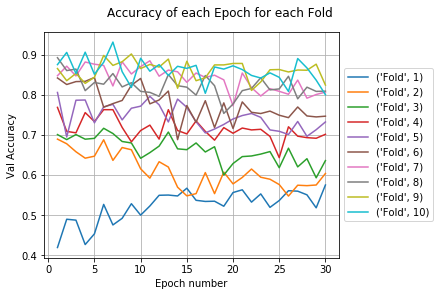

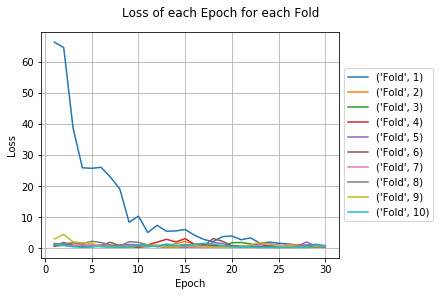

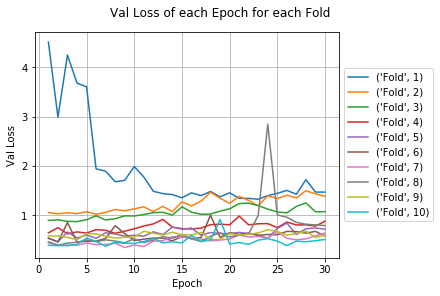

In [25]:
Graph_Epochs_model_1=Graph_func(Epoch_number,Epoch_array_accuracy_1,Val_accuracy_array_1,Loss_array_1,Val_Loss_array_1) 

In [26]:
Table_model_1=table_maker(Fold_accuracy_1,end_array_1,Avg_Accuracy_1,Time_1)

  Fold  Accuracy  Time Taken
0    1  0.714680     31.1357
1    2  0.846129     31.1581
2    3  0.879135     31.1261
3    4  0.890557     30.8901
4    5  0.909121     31.5637
5    6  0.922104     31.4408
6    7  0.928428     31.2737
7    8  0.935316     62.7569
8    9  0.941253     27.6475
9   10  0.948685     28.8891

    Average Accuracy  Total Time
0          0.891541    337.8817


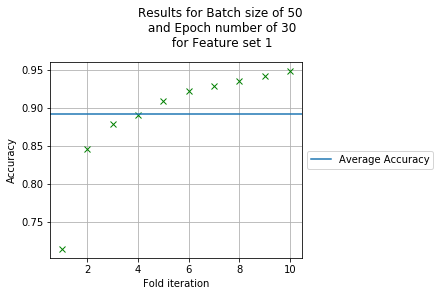

In [27]:
Graph_Avg_model_1=Graph_Avg_maker(Fold_iteration,Fold_accuracy_1,Avg_Accuracy_1)

## New Model 2

In [28]:
model_2=Sequential()

model_2.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(60,4,1)))
model_2.add(MaxPooling2D(padding="same"))
model_2.add(Dropout(0.5))

model_2.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model_2.add(MaxPooling2D(padding="same"))
model_2.add(Dropout(0.5))

model_2.add(Flatten())

model_2.add(Dense(256,activation="relu"))
model_2.add(Dropout(0.5))

model_2.add(Dense(512,activation="relu"))
model_2.add(Dropout(0.5))

model_2.add(Dense(1024,activation="relu"))
model_2.add(Dropout(0.5))

model_2.add(Dense(10,activation="softmax"))
Model_2=model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
Accuracy_array_2=[]
accuracy_total_2=0
end_array_2=[]

Epoch_array_accuracy_2=[]
Loss_array_2=[]
Fold_accuracy_2=[]

Val_accuracy_array_2=[]
Val_Loss_array_2=[]

Avg_Accuracy_2=[]
Time_2=[]

In [30]:
Model_2=Model_run(Model_2,model_2,Accuracy_array_2,accuracy_total_2,end_array_2,Epoch_array_accuracy_2,Loss_array_2,
             Fold_accuracy_2,Val_accuracy_array_2,Val_Loss_array_2)
Avg_Accuracy_2=Model_2[0]
Time_2=Model_2[1]


FOLD 1 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (0, 1)
Training off of Folds: [2, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 1 is 0.144
Time to train Fold 1 : 202.4317 seconds.

FOLD 2 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (1, 2)
Training off of Folds: [0, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 2 is 0.161
Time to train Fold 2 : 193.6756 seconds.

FOLD 3 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (2, 3)
Training off of Folds: [0, 1, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 3 is 0.167
Time to train Fold 3 : 192.0425 seconds.

FOLD 4 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (3, 4)
Training off of Folds: [0, 1, 2, 5, 6, 7, 8, 9]
Accuracy of Fold 4 is 0.162
Time to train Fold 4 : 171.0397 seconds.

FOLD 5 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (4, 5)
Training off of Folds: [0, 1, 2, 3, 6, 7, 8, 9]
Accuracy of Fold 5 is 0.159
Time to train Fold 5 : 208.8571 seconds.

FOLD 6 
- - - - - - - - - - - - - - - -

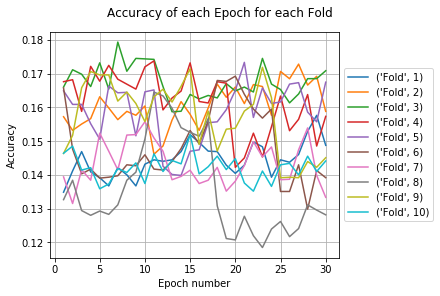

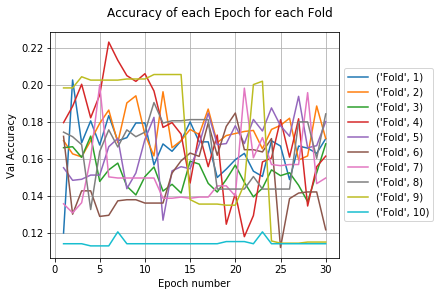

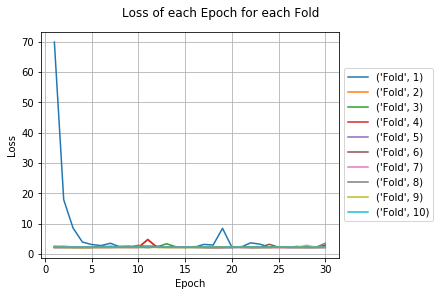

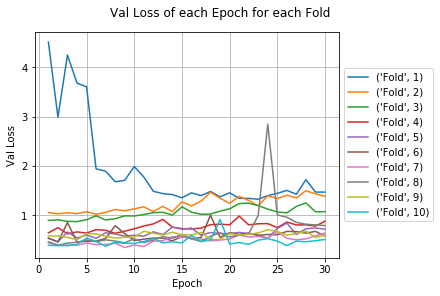

In [31]:
Graph_Epochs_model_2=Graph_func(Epoch_number,Epoch_array_accuracy_2,Val_accuracy_array_2,Loss_array_2,Val_Loss_array_2) 

In [32]:
Table_model_2=table_maker(Fold_accuracy_2,end_array_2,Avg_Accuracy_2,Time_2)

  Fold  Accuracy  Time Taken
0    1  0.144470    202.4317
1    2  0.160563    193.6756
2    3  0.167493    192.0425
3    4  0.161794    171.0397
4    5  0.158559    208.8571
5    6  0.148216    206.6419
6    7  0.143261    252.1654
7    8  0.135818    244.8275
8    9  0.157037    252.9517
9   10  0.142129    259.8195

    Average Accuracy  Total Time
0          0.151934   2184.4526


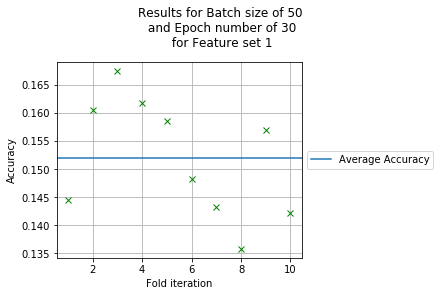

In [33]:
Graph_Avg_model_2=Graph_Avg_maker(Fold_iteration,Fold_accuracy_2,Avg_Accuracy_2)

## Model Comparisson

In [ ]:
%matplotlib inline

fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())

ax1.plot(Fold_iteration,Fold_accuracy,"rx",label="Model Git hub")
ax1.axhline(y=Avg_Accuracy,label='Average Accuracy Model Git hub',color='r',ls="--")

ax1.plot(Fold_iteration,Fold_accuracy_1,"gx",label="Model 1")
ax1.axhline(y=Avg_Accuracy_1,label='Average Accuracy Model 1',color='g',ls="--")

ax1.plot(Fold_iteration,Fold_accuracy_2,"bx",label="Model 2")
ax1.axhline(y=Avg_Accuracy_2,label='Average Accuracy Model 2',color='b',ls="--")

#ax1.set_title('Results for a batch size of',Batch_size,'and',Epoch_number,'.')
fig.suptitle(f"Model comparisson")
ax1.set_xlabel("Fold iteration")
ax1.set_ylabel("Accuracy")
ax1.grid()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))